In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams['axes.spines.top']=False
plt.rcParams['axes.spines.right']=False
import gpxpy
import gpxpy.gpx

In [3]:
# parse my testgpx file
with open('TESTGPX.gpx', 'r', encoding='utf-8') as gpx_file:
    gpx = gpxpy.parse(gpx_file)

In [4]:
gpx

GPX(tracks=[GPXTrack(name='Lunch Ride', segments=[GPXTrackSegment(points=[...])])])

In [5]:
# number of points in the file
gpx.get_track_points_no()

773

In [6]:
# elevations extremes
gpx.get_elevation_extremes()

MinimumMaximum(minimum=193.8, maximum=220.0)

In [7]:
# get uphill and downhill...cumulatively, should be about the same
gpx.get_uphill_downhill()
# nevermind, it wasn't a round trip

UphillDownhill(uphill=23.53000000000003, downhill=46.33000000000001)

In [10]:
# only 1 track in this file
gpx.tracks[0]

GPXTrack(name='Lunch Ride', segments=[GPXTrackSegment(points=[...])])

In [12]:
# also only 1 segment
gpx.tracks[0].segments[0]

GPXTrackSegment(points=[...])

In [16]:
# points?
gpx.tracks[0].segments[0].points[:10]

[GPXTrackPoint(29.465159, -98.518954, elevation=218.6, time=datetime.datetime(2017, 5, 16, 16, 37, 29, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(29.465002, -98.518949, elevation=218.8, time=datetime.datetime(2017, 5, 16, 16, 37, 31, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(29.464959, -98.518924, elevation=218.8, time=datetime.datetime(2017, 5, 16, 16, 37, 32, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(29.464957, -98.518895, elevation=218.8, time=datetime.datetime(2017, 5, 16, 16, 37, 34, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(29.464941, -98.518772, elevation=218.9, time=datetime.datetime(2017, 5, 16, 16, 37, 35, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(29.464944, -98.51886, elevation=219.0, time=datetime.datetime(2017, 5, 16, 16, 37, 36, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(29.46499, -98.519037, elevation=219.0, time=datetime.datetime(2017, 5, 16, 16, 37, 37, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(29.464892, -98.51902, elevation=219.0, time=datetime.datetime(2017, 5, 16, 16, 37, 38, tzinfo=Simp

In [17]:
# extracting points and storing as list of dictionaries
route_info = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            route_info.append({
                'latitude': point.latitude,
                'longitude': point.longitude,
                'elevation': point.elevation
            })

In [18]:
route_info[:3]

[{'latitude': 29.465159, 'longitude': -98.518954, 'elevation': 218.6},
 {'latitude': 29.465002, 'longitude': -98.518949, 'elevation': 218.8},
 {'latitude': 29.464959, 'longitude': -98.518924, 'elevation': 218.8}]

In [20]:
# pandas DF ftw
route_df = pd.DataFrame(route_info)
route_df.head()

,latitude,longitude,elevation
0,29.465159,-98.518954,218.6
1,29.465002,-98.518949,218.8
2,29.464959,-98.518924,218.8
3,29.464957,-98.518895,218.8
4,29.464941,-98.518772,218.9


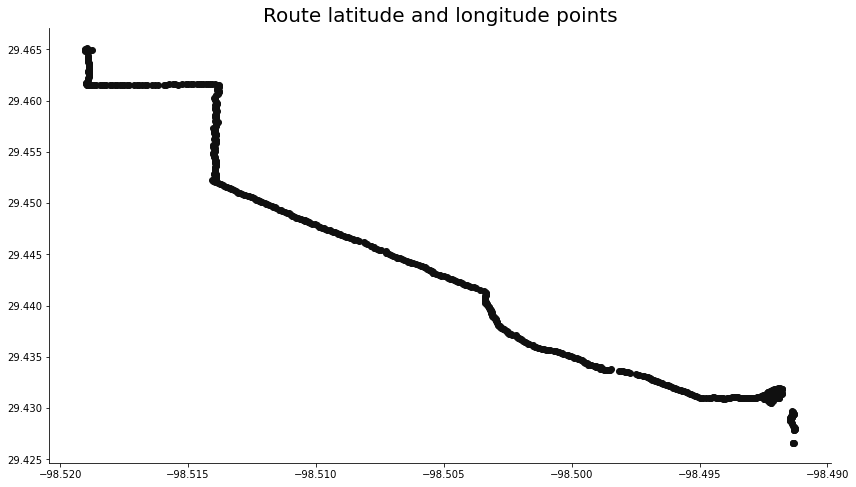

In [21]:
# mpl quick viz
plt.figure(figsize=(14, 8))
plt.scatter(route_df['longitude'], route_df['latitude'], color='#101010')
plt.title('Route latitude and longitude points', size=20);

### Looks like a ride from my house down Fredricksburg to...downtown

In [22]:
import folium

In [25]:
route_map = folium.Map(
#     location=[45.79757947, 15.9007929]
    location = [29.424349, -98.491142],
    zoom_start=13,
    tiles='OpenStreetMap',
    width=1024,
    height=600
)
display(route_map)

In [28]:
route_map = folium.Map(
#     location=[45.79757947, 15.9007929]
    location = [29.424349, -98.491142],
    zoom_start=13,
    tiles='OpenStreetMap',
    width=1024,
    height=600
)

for _, row in route_df.iterrows():
    folium.CircleMarker(
        location= [row['latitude'], row['longitude']],
        radius=3
    ).add_to(route_map)
display(route_map)

## so, the minor problem here is that the data points are represented by circles.  apparently,  we will resolve by converting into ... list of tuples that folium can render as a polygonal linee

In [32]:
coordinates = [tuple(x) for x in route_df[['latitude', 'longitude']].to_numpy()]

# coordinates

In [31]:
route_map = folium.Map(
#     location=[45.79757947, 15.9007929]
    location = [29.424349, -98.491142],
    zoom_start=13,
    tiles='OpenStreetMap',
    width=1024,
    height=600
)

coordinates = [tuple(x) for x in route_df[['latitude', 'longitude']].to_numpy()]
folium.PolyLine(coordinates, weight=6).add_to(route_map)


# for _, row in route_df.iterrows():
#     folium.CircleMarker(
#         location= [row['latitude'], row['longitude']],
#         radius=3
#     ).add_to(route_map)

display(route_map)

- Ah, I remember this ride, a day I paid a visit to the SW School of Art

In [33]:
route_map = folium.Map(
#     location=[45.79757947, 15.9007929]
    location = [29.424349, -98.491142],
    zoom_start=13,
    tiles='CartoDBPositron',
    width=1024,
    height=600
)

coordinates = [tuple(x) for x in route_df[['latitude', 'longitude']].to_numpy()]
folium.PolyLine(coordinates, weight=6).add_to(route_map)


# for _, row in route_df.iterrows():
#     folium.CircleMarker(
#         location= [row['latitude'], row['longitude']],
#         radius=3
#     ).add_to(route_map)

display(route_map)

In [34]:
route_map = folium.Map(
#     location=[45.79757947, 15.9007929]
    location = [29.424349, -98.491142],
    zoom_start=13,
    tiles='CartoDBDark_Matter',
    width=1024,
    height=600
)

coordinates = [tuple(x) for x in route_df[['latitude', 'longitude']].to_numpy()]
folium.PolyLine(coordinates, weight=6).add_to(route_map)


# for _, row in route_df.iterrows():
#     folium.CircleMarker(
#         location= [row['latitude'], row['longitude']],
#         radius=3
#     ).add_to(route_map)

display(route_map)

In [36]:
folium.Map?